In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def print_bar(counts, x_size=7.2, y_size=5.2):
    sns.set_style('darkgrid')
    sns.set(rc={'figure.figsize':(x_size, y_size)})

    x = counts.index.tolist()
    y = counts.values.tolist()

    sns.barplot(x=x, y=y)
    

## Transactions

In [20]:
df_trans = pd.read_csv("../src/data/preprocessed/trans_dev.csv", delimiter=";")
df_trans.head()

c:\Users\julia\Documents\feup-ac\AI\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,trans_year,trans_month,trans_day,trans_date
0,1548749,5270,credit,cash,800.0,800.0,NaN,NaN,NaN,1993,1,13,1993-01-13
1,1548750,5270,credit,another bank,44749.0,45549.0,NaN,IJ,80269753.0,1993,1,14,1993-01-14
2,3393738,11265,credit,cash,1000.0,1000.0,NaN,NaN,NaN,1993,1,14,1993-01-14
3,3122924,10364,credit,cash,1100.0,1100.0,NaN,NaN,NaN,1993,1,17,1993-01-17
4,1121963,3834,credit,cash,700.0,700.0,NaN,NaN,NaN,1993,1,19,1993-01-19


### Columns with null
First let's identify what columns that have null values

In [21]:
df_trans.isna().any()

trans_id       False
account_id     False
type           False
operation       True
amount         False
balance        False
k_symbol        True
bank            True
account         True
trans_year     False
trans_month    False
trans_day      False
trans_date     False
dtype: bool

### Columns analysis
Now let's check what are the possible values for each columns and their frequence, considering that the columns `operation`, `k_symbol`, `bank` and `account`. These null columns needs to be carefully analysed in order to treat the null values.

__ACCOUNT__  
Let's see the mean of the number of transactions per year. This data must be important, since __might show how active a client is__.

In [22]:
## How many year per person.
group_account_year = df_trans.groupby(by=['account_id', 'trans_year'], axis=0, as_index=False).size()
count_account_year = group_account_year['account_id'].value_counts()

index_count_year = count_account_year.index 
values_count_year = count_account_year.values

df = pd.DataFrame({'account_id': index_count_year, 'count_year': values_count_year})
df.set_axis(['ids', 'count'], axis=1, inplace=False)

# Get the number of transaction per user
group_account = df_trans.groupby(by=['account_id'], axis=0, as_index=False).size()

sorted_count_year = df.sort_values("account_id")
sorted_count_year['trans'] = group_account["size"]
sorted_count_year['trans_year'] = sorted_count_year['trans'] / sorted_count_year['count_year']

sorted_count_year.describe()

,account_id,count_year,trans,trans_year
count,3370.000000,3370.000000,3370.000000,3370.000000
mean,2610.691988,2.354599,117.710682,67.555935
std,2124.893256,1.239171,96.425643,71.265734
min,1.000000,1.000000,1.000000,0.250000
25%,1121.250000,1.000000,31.000000,14.000000
50%,2277.000000,2.000000,94.000000,46.750000
75%,3444.500000,4.000000,201.000000,93.500000
max,11382.000000,4.000000,441.000000,441.000000


__TYPE__

In [42]:
print(df_trans['type'].value_counts())
print("\nNaN:", df_trans['type'].isna().sum())

withdrawal    237217
credit        159468
Name: type, dtype: int64

NaN: 0


__OPERATION__ 

In [41]:
df_trans['operation'].value_counts()
print("\nNaN:", df_trans['operation'].isna().sum())


NaN: 70761


__K_SYMBOL__  

From this analysis, we have concluded taht __the number of NaN values is too high to discard__ and also too high to substitute for any of the other values.  
Thus prehaps should be considered as a value. It's still important to correlate this column with others to search for any patterns. _(to see with the group)_

In [25]:
counts_k = df_trans['k_symbol'].value_counts()
print(counts_k)
print("\nNaN:", df_trans['k_symbol'].isna().sum())

interest credited                        70761
payment for statement                    58377
household                                42839
old-age pension                          13502
insurrance payment                        6592
sanction interest if negative balance      305
Name: k_symbol, dtype: int64

NaN: 204309


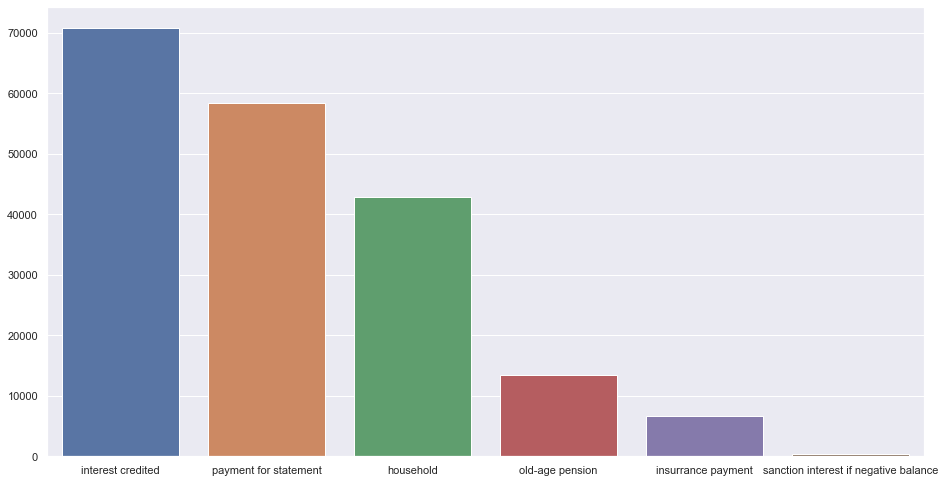

In [26]:
print_bar(counts_k, x_size=15.7, y_size=8.27)

__BANK__  
There's a big ammount of accounts that do not have specified the bank account.

In [27]:
counts_bank = df_trans['bank'].value_counts()
print(counts_bank)
print("\nNaN:", df_trans['bank'].isna().sum())

ST    8114
GH    7886
EF    7878
AB    7666
UV    7618
OP    7595
IJ    7536
YZ    7471
QR    7413
KL    7397
WX    7033
CD    7009
MN    6626
Name: bank, dtype: int64

NaN: 299443


__ACCOUNT__ 

In [28]:
counts_account = df_trans['account'].value_counts()
print(counts_account)
print("\nNaN:", df_trans['account'].isna().sum())

0.0           4987
15916598.0      48
62457513.0      48
6149286.0       48
42988401.0      48
              ... 
99218499.0       1
54261672.0       1
28306174.0       1
91523855.0       1
53761804.0       1
Name: account, Length: 4536, dtype: int64

NaN: 294456


__OPERATION__

In [29]:
counts_operation = df_trans['operation'].value_counts()
print(counts_operation)
print("\nNaN:", df_trans['operation'].isna().sum())

cash            227472
another bank     97242
credit card       1210
Name: operation, dtype: int64

NaN: 70761


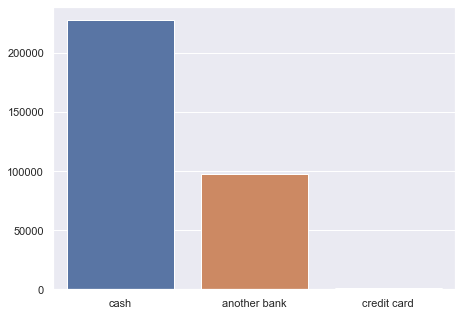

In [30]:
print_bar(counts_operation)

__YEAR__

In [31]:
counts_year = df_trans['trans_year'].value_counts()
print(counts_year)

1996    165501
1995    117745
1994     85610
1993     27829
Name: trans_year, dtype: int64


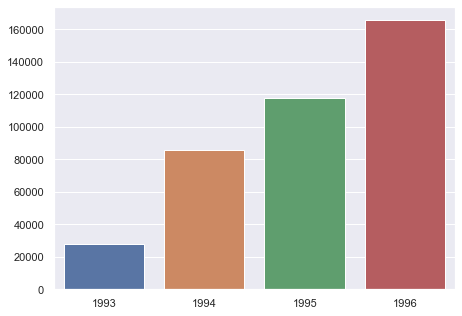

In [32]:
print_bar(counts_year)

__MONTH__

In [33]:
counts_month = df_trans['trans_month'].value_counts()
print(counts_month)

12    43887
1     42005
11    36729
10    35792
9     34259
8     32937
6     32583
7     31485
5     28917
4     27373
3     26407
2     24311
Name: trans_month, dtype: int64


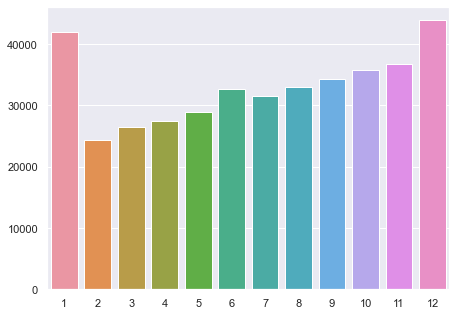

In [34]:
print_bar(counts_month)

__DAYS__

In [35]:
counts_day = df_trans['trans_day'].value_counts()
print(counts_day)

31    77774
30    48971
13    18335
14    18231
12    17984
6     17873
5     17858
9     17577
11    17315
7     16996
8     16839
10    15938
28     9241
29     8014
18     5839
15     4973
17     4944
16     4937
4      4532
19     4466
20     4448
2      4433
23     4429
22     4398
3      4371
26     4364
27     4331
1      4327
25     4326
21     4313
24     4308
Name: trans_day, dtype: int64


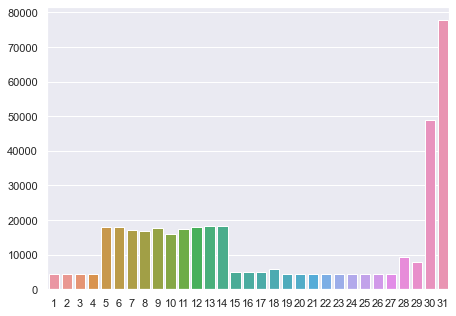

In [36]:
print_bar(counts_day)

### Distribution

__AMOUNT__  
Here we see that the majority of the people made transactions around the values (0, 10000].

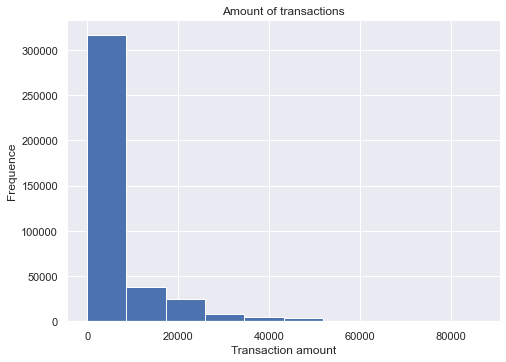

In [37]:
fig, ax = plt.subplots()

# Create the graphics
plt.hist(df_trans['amount'])
ax.set_title("Amount of transactions")
ax.set_xlabel("Transaction amount")
ax.set_ylabel("Frequence")
# Display the figures in a nice way
fig.tight_layout()

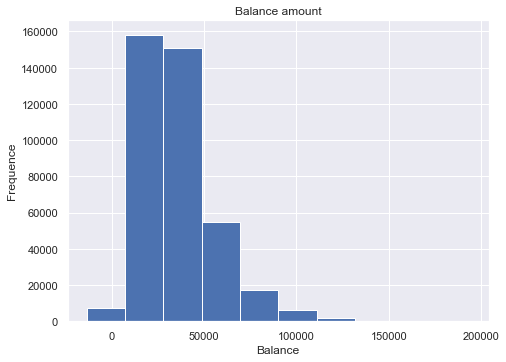

In [38]:
fig, ax = plt.subplots()

# Create the graphics
plt.hist(df_trans['balance'])
ax.set_title("Balance amount")
ax.set_xlabel("Balance")
ax.set_ylabel("Frequence")
# Display the figures in a nice way
fig.tight_layout()

### Heatmap

<AxesSubplot:>

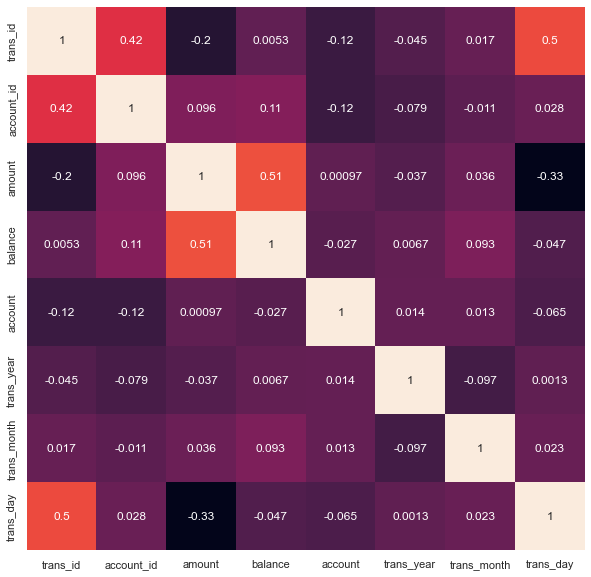

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_trans.corr(), annot=True, cbar=False)